# Практична робота №6
### Студента групи МІТ-31
### Переверзева Олексія

#### Побудува нейронної мережі з трьома повнозв'язними шарами (Dense layers) та навчити її на вашому власному наборі даних для регресії (200 епох)

In [139]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
n_features = 3
X, y = make_regression(
    n_samples=1000, 
    n_features=n_features, 
    n_informative=3, 
    noise=10, 
    random_state=15
)

data = pd.DataFrame(X, columns = [f"Feature {i+1}" for i in range(n_features)])
data['Target'] = y

data.to_csv('regression.csv', index=False)

In [140]:
data

,Feature 1,Feature 2,Feature 3,Target
0,-1.390149,-0.864768,-0.503048,-113.368127
1,0.476497,0.929484,-0.066844,64.174738
2,-0.145441,-0.133421,-1.156080,-72.836081
3,-0.304894,0.442675,0.460948,42.972898
4,2.513588,0.871904,-0.154166,91.237322
...,...,...,...,...
995,-0.462826,-0.445704,-0.419322,-62.273954
996,0.466243,0.032128,0.148560,15.921901
997,1.355025,1.025647,1.022461,147.466381
998,-1.179544,-0.967190,0.282311,-76.793051


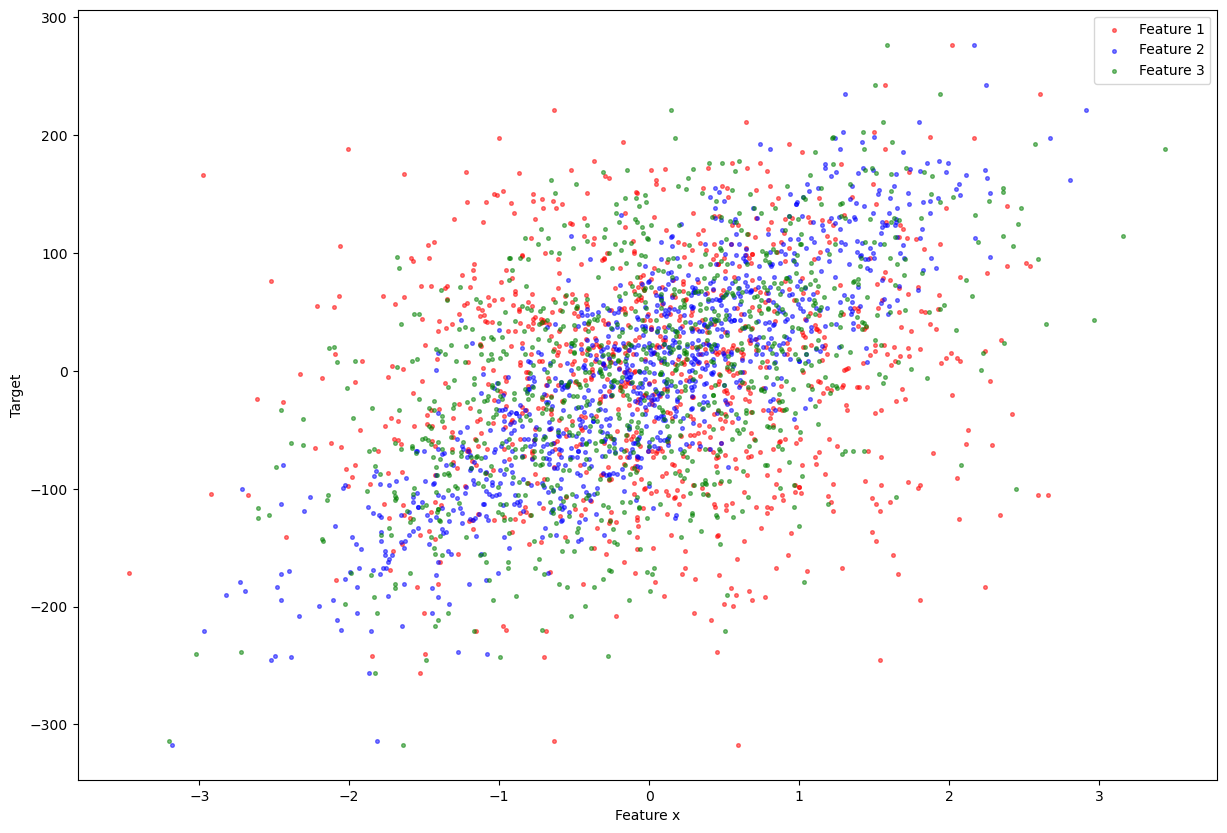

In [141]:
# Візуалізуємо згенеровані дані
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 10))
plt.subplot(132)
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Brown']
for i in range (n_features):
    plt.scatter(X[:, i], y, s=7, color= colors[i], label=f'Feature {i+1}', alpha=0.5)
plt.xlabel('Feature x')
plt.ylabel('Target')
plt.legend()
plt.show()

In [142]:
# Розділення даних на навчальний та тестовий набори

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [143]:
# Модель нейронної мережі з трьома шарами

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_nn_v1 = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

In [144]:
model_nn_v1.compile(optimizer='adam', loss='mae', metrics=['mae'])
results_v1 = model_nn_v1.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
25/25 [==============================] - 1s 8ms/step - loss: 72.6176 - mae: 72.6176 - val_loss: 73.3331 - val_mae: 73.3331
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 71.9017 - mae: 71.9017 - val_loss: 72.3853 - val_mae: 72.3853
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 70.5751 - mae: 70.5751 - val_loss: 70.5691 - val_mae: 70.5691
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 68.2038 - mae: 68.2038 - val_loss: 67.5266 - val_mae: 67.5266
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 64.2591 - mae: 64.2591 - val_loss: 62.6021 - val_mae: 62.6021
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 58.1152 - mae: 58.1152 - val_loss: 55.1868 - val_mae: 55.1868
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 49.3449 - mae: 49.3449 - val_loss: 44.9260 - val_mae: 44.9260
Epoch 8/200
25/25 [==============================] - 0s

In [145]:
# Оцінка моделі на основі навчальних даних та тестових даних
print("Навчальні втрати (MAE) у навчальних даних:", model_nn_v1.evaluate(X_train, y_train, verbose=0))

print("Тестові втрати (MAE) у тестових даних:", model_nn_v1.evaluate(X_test, y_test, verbose=0))

Навчальні втрати (MAE) у навчальних даних: [7.627850532531738, 7.627850532531738]
Тестові втрати (MAE) у тестових даних: [8.581342697143555, 8.581342697143555]


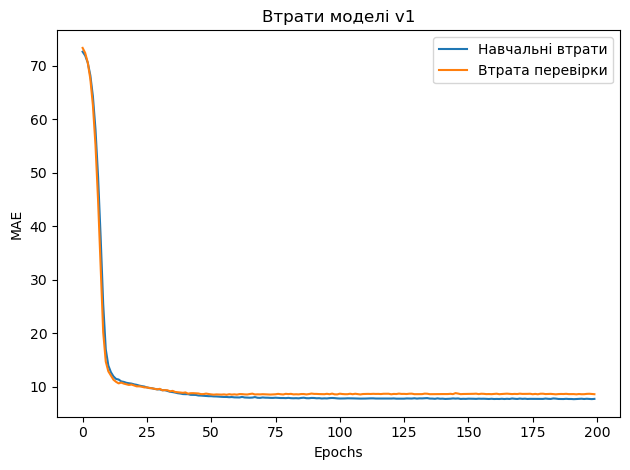

In [146]:
# Візуалізація результатів навчання

plt.plot(results_v1.history['loss'], label='Навчальні втрати')
plt.plot(results_v1.history['val_loss'], label='Втрата перевірки')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Втрати моделі v1')
plt.legend()
plt.tight_layout()
plt.show()

7/7 [==============================] - 0s 965us/step


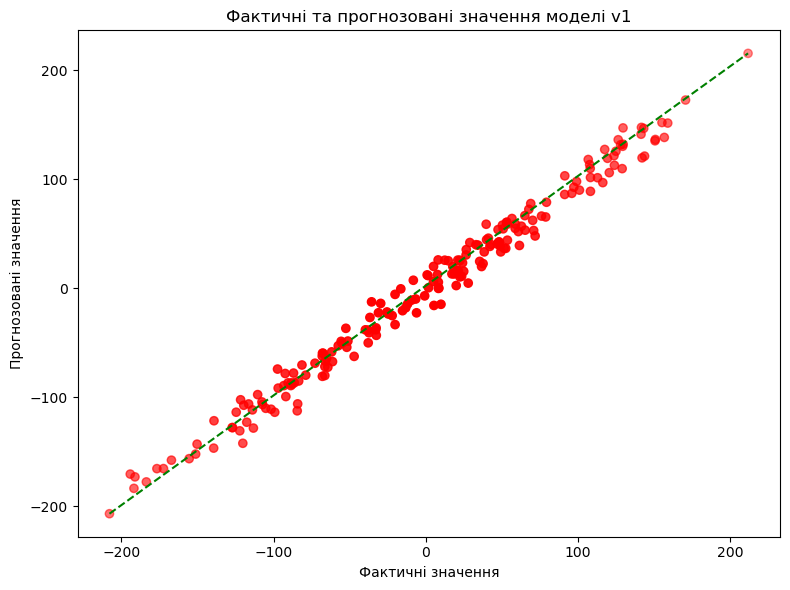

In [147]:
# Візуалізація реальних і прогнозованих значень

y_pred_v1 = model_nn_v1.predict(X_test)
plt.figure(figsize=(8, 6))
distance = np.abs(y_test - y_pred_v1) 
max_distance = np.max(distance)
for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)  # Прозорість в залежності від відстані
    plt.scatter(y_test[i], y_pred_v1[i], c='red', alpha=alpha)
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.plot([min(y_test), max(y_test)], [min(y_pred_v1), max(y_pred_v1)], ls='--', c ='green')
plt.title('Фактичні та прогнозовані значення моделі v1')
plt.tight_layout()
plt.show()

#### Спроба покращити результати різними підходами

In [148]:
data = pd.read_csv('regression.csv')
X = data.drop('Target', axis=1)
y = data['Target']

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

Побудова більшої моделі з чотирма повнозв'язними шарами, збільшення кількості нейронів у кожному шарі

In [150]:
model_nn_v2 = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

Тренування проводити довше, наприклад, 300 епох, замість 200

In [151]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model_nn_v2.compile(optimizer=Adam(learning_rate=0.01), loss='mae', metrics=['mae'])
results_v2 = model_nn_v2.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300


25/25 [==============================] - 1s 8ms/step - loss: 48.3335 - mae: 48.3335 - val_loss: 18.7006 - val_mae: 18.7006
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 13.7440 - mae: 13.7440 - val_loss: 11.4570 - val_mae: 11.4570
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 9.7788 - mae: 9.7788 - val_loss: 9.6521 - val_mae: 9.6521
Epoch 4/300
25/25 [==============================] - 0s 2ms/step - loss: 9.0431 - mae: 9.0431 - val_loss: 9.2485 - val_mae: 9.2485
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 9.6986 - mae: 9.6986 - val_loss: 8.4300 - val_mae: 8.4300
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 8.9595 - mae: 8.9595 - val_loss: 9.7203 - val_mae: 9.7203
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 8.7723 - mae: 8.7723 - val_loss: 8.8159 - val_mae: 8.8159
Epoch 8/300
25/25 [==============================] - 0s 2ms/step - loss: 8.9835 - mae: 

In [152]:
# Оцінка моделі на основі навчальних даних та тестових даних
print("Навчальні втрати (MAE) у навчальних даних:", model_nn_v2.evaluate(X_train, y_train, verbose=0))

print("Тестові втрати (MAE) у тестових даних:", model_nn_v2.evaluate(X_test, y_test, verbose=0))

Навчальні втрати (MAE) у навчальних даних: [7.084178924560547, 7.084178924560547]
Тестові втрати (MAE) у тестових даних: [8.755664825439453, 8.755664825439453]


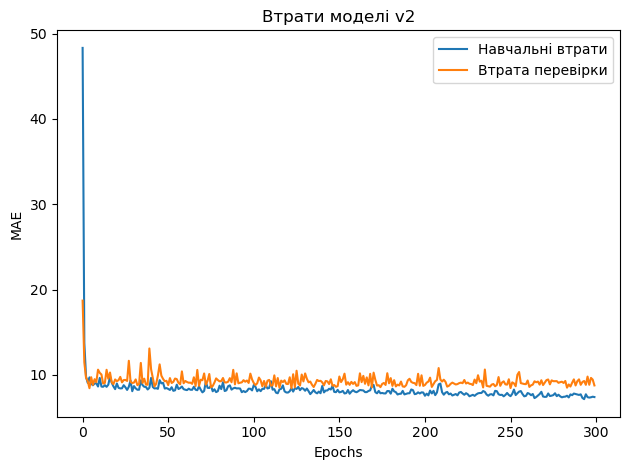

In [153]:
# Візуалізація результатів навчання

plt.plot(results_v2.history['loss'], label='Навчальні втрати')
plt.plot(results_v2.history['val_loss'], label='Втрата перевірки')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Втрати моделі v2')
plt.legend()
plt.tight_layout()
plt.show()

7/7 [==============================] - 0s 833us/step


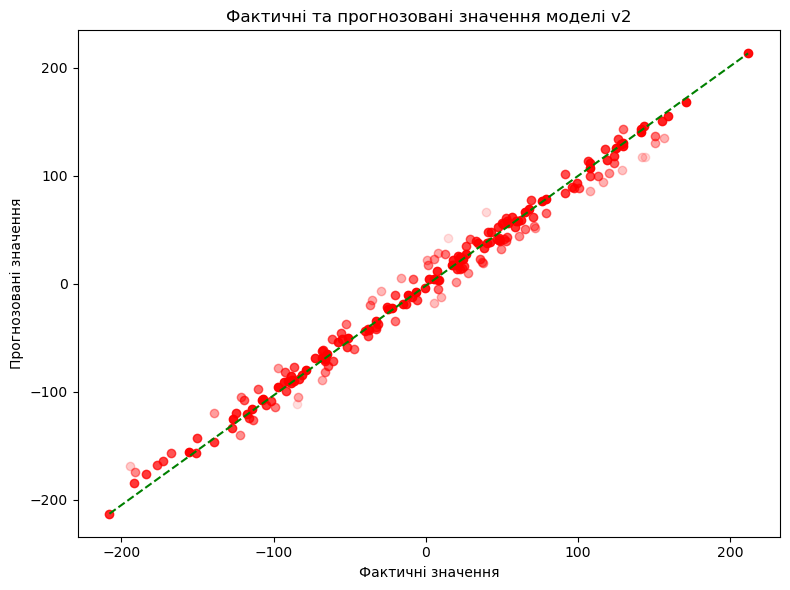

In [154]:
# Візуалізація реальних і прогнозованих значень

y_pred_v2 = model_nn_v2.predict(X_test)
plt.figure(figsize=(8, 6))
y_test = y_test.ravel()
y_pred_v2 = y_pred_v2.ravel()
distance = np.abs(y_test - y_pred_v2) 
max_distance = np.max(distance)
for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)  # Прозорість в залежності від відстані
    plt.scatter(y_test[i], y_pred_v2[i], c='red', alpha=alpha)
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.plot([min(y_test), max(y_test)], [min(y_pred_v2), max(y_pred_v2)], ls='--', c ='green')
plt.title('Фактичні та прогнозовані значення моделі v2')
plt.tight_layout()
plt.show()

*Які будуть результати, якщо тренування проводити довше (наприклад, 300 епох замість 200)?*

Якщо збільшити кількість епох у тренуванні з 200 до 300, це може призвести до зниження значення функції втрат та підвищення точності на тренувальному наборі. Проте також існує ризик перенавчання та збільшення часу тривалості самого процесу навчання.

*Ознайомтеся з документацією [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) та з'ясуйте, що являє собою перший параметр. Які зміни відбудуться, якщо збільшити його в 10 разів?*

Перший параметр оптимізатора Adam, який має значення за замовчуванням 0,001, називається learning_rate і відповідає за розмір кроку, який використовується при оновленні параметрів моделі під час навчання. Це визначає, наскільки великими кроками ми рухаємося в напрямку мінімізації функції втрат під час градієнтного спуску. Збільшення значення параметра learning_rate у 10 разів може призвести до прискореного навчання моделі, але при цьому існує ризик пропускання мінімуму, нестабільності та перенавантаження.

Висновки: У нашому випадку виявлено невелику різницю у результатах моделей. Хоча ця відмінність не є значущою, вона вказує на те, що ймовірно, наша модель була тренована протягом занадто великого проміжку часу, що призвело до невеликої розбіжності в отриманих результатах.